In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

Nejdříve načtu data.

In [2]:
data = pd.read_csv("data/proccessed_data.csv")
data.head()

,Unnamed: 0,id,party_name,descriptions,gender,is_foreigner,location,descr_procc
0,0,00000023-93ee-4754-a3c4-5748a4f420ad,STAN,"hasič;Všeruby (Domažlice);ex-zast_obec;ex-kandidát za """"ZA ROZVOJ OBCE"""";ex-kand_obec",1,2,554456,"['hasič', 'všeruby', '(domažlice)', 'ex-zastupitel', 'obec', 'ex-kandidát', 'rozvoj', 'obec', 'ex-kandidát', 'obec']"
1,1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,BEZPP,Potravinářská komora České republiky;lobby;mluvčí,2,2,0,"['potravinářský', 'komora', 'český', 'republika', 'lobby', 'mluvčí']"
2,2,00017467-20c1-4151-9126-088f9bff86e9,BEZPP,umělec;dirigent,1,2,0,"['umělec', 'dirigent']"
3,3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,BEZPP,umělec;básnířka,2,2,0,"['umělec', 'básnířka']"
4,4,00040844-ca87-4a12-b394-eecd78a0166f,BEZPP,mluvčí Rožnov pod Radhoštěm;umělec;grafička a výtvarnice,2,2,0,"['mluvčí', 'rožnov', 'radhoštěm', 'umělec', 'grafička', 'výtvarnice']"


Vidím zbytečný sloupec a proto ho vymažu.

In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,id,party_name,descriptions,gender,is_foreigner,location,descr_procc
0,00000023-93ee-4754-a3c4-5748a4f420ad,STAN,"hasič;Všeruby (Domažlice);ex-zast_obec;ex-kandidát za """"ZA ROZVOJ OBCE"""";ex-kand_obec",1,2,554456,"['hasič', 'všeruby', '(domažlice)', 'ex-zastupitel', 'obec', 'ex-kandidát', 'rozvoj', 'obec', 'ex-kandidát', 'obec']"
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,BEZPP,Potravinářská komora České republiky;lobby;mluvčí,2,2,0,"['potravinářský', 'komora', 'český', 'republika', 'lobby', 'mluvčí']"
2,00017467-20c1-4151-9126-088f9bff86e9,BEZPP,umělec;dirigent,1,2,0,"['umělec', 'dirigent']"
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,BEZPP,umělec;básnířka,2,2,0,"['umělec', 'básnířka']"
4,00040844-ca87-4a12-b394-eecd78a0166f,BEZPP,mluvčí Rožnov pod Radhoštěm;umělec;grafička a výtvarnice,2,2,0,"['mluvčí', 'rožnov', 'radhoštěm', 'umělec', 'grafička', 'výtvarnice']"


In [4]:
data.descr_procc[1]

"['potravinářský', 'komora', 'český', 'republika', 'lobby', 'mluvčí']"

Jak lze vidět, sloupec s odděleným preprocesovanými slovy ma listy uležený jako string, je tudíž nutné tato data transformovat do formátu listu.

In [5]:
import ast

# converts the column into form of a list
data.descr_procc = data.descr_procc.apply(ast.literal_eval)
data.descr_procc[1]

['potravinářský', 'komora', 'český', 'republika', 'lobby', 'mluvčí']

Popisky máme již reprezentovány správně, dalším krokem bude tato v listu uložená data převést do bag of words formátu.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
bag = vec.fit_transform(data.descr_procc.apply(lambda x: ' '.join(x)))
vec.get_feature_names_out()

array(['aaa', 'aaabyty', 'aag', ..., 'žš', 'žžm', 'ˇyďár'], dtype=object)

Vytvořili jsme samotnou matici, a teď ji přeneseme do pandas Dataframe.

In [7]:
bag_of_words=pd.DataFrame.sparse.from_spmatrix(bag,columns=vec.get_feature_names_out())
bag_of_words.head()

,aaa,aaabyty,aag,aakrchitektura,aalborg,aarhus,ab,abatyše,abb,abc,...,žďár,žďárce,žďárku,žďársko,žďársku,žďárský,žďáře,žš,žžm,ˇyďár
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Orientačně se podíváme na nejčastější výrazy.

In [8]:
bag_of_words.sum().sort_values(ascending=False).head(50)

kandidát         16835
ex               15818
odborník         11387
obec             11323
sport             9604
zastupitel        8923
umělec            8756
reg               8178
zpr               8173
kultura           7330
byznys            7180
ředitel           6387
posl              5836
mluvčí            5710
spolek            4671
starosta          4574
vedoucí           4053
akademik          3734
zdravotník        3523
úředník           3358
novinář           3205
český             3035
předseda          2610
ředitelka         2563
město             2157
kraj              1943
ido               1866
om                1865
social            1819
ozbrojenec        1749
čr                1714
trenér            1632
společnost        1592
krajský           1558
ústav             1451
bývalý            1433
muzeum            1414
církev            1411
místostarosta     1373
politik           1340
univerzita        1255
odbor             1236
fotbalista        1232
hokejista  

In [9]:
from scipy.sparse import csr_matrix

data_matrix = csr_matrix(bag_of_words.sparse.to_coo())

In [10]:
from sklearn.cluster import KMeans

def kmean_explore(data, max_clusters: int) -> list:
    scores = []
    
    for i in range(2, max_clusters+1):
        km = KMeans(n_clusters=i, n_init=10)
        km.fit(data_matrix)
        score = km.score(data_matrix)
        scores.append(np.abs(score))
    return scores

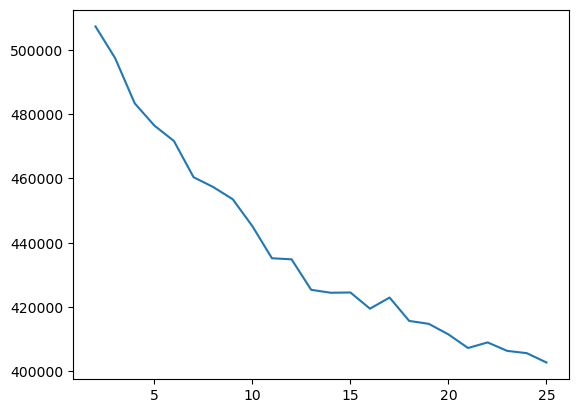

CPU times: user 9min 53s, sys: 27.7 s, total: 10min 20s
Wall time: 2min 44s


In [11]:
%%time
max_cluster = 25
cluster_n = list(range(2, max_cluster+1))
scores = kmean_explore(data_matrix, max_cluster)

plt.plot(cluster_n, scores)
plt.show()

In [12]:
km = KMeans(n_clusters=16, n_init=10)

predictions = km.fit_predict(data_matrix)

In [13]:
predictions

array([ 5,  3, 15, ...,  9,  3,  2], dtype=int32)

In [14]:
data['predictions'] = predictions

In [15]:
data.head()

,id,party_name,descriptions,gender,is_foreigner,location,descr_procc,predictions
0,00000023-93ee-4754-a3c4-5748a4f420ad,STAN,"hasič;Všeruby (Domažlice);ex-zast_obec;ex-kandidát za """"ZA ROZVOJ OBCE"""";ex-kand_obec",1,2,554456,"[hasič, všeruby, (domažlice), ex-zastupitel, obec, ex-kandidát, rozvoj, obec, ex-kandidát, obec]",5
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,BEZPP,Potravinářská komora České republiky;lobby;mluvčí,2,2,0,"[potravinářský, komora, český, republika, lobby, mluvčí]",3
2,00017467-20c1-4151-9126-088f9bff86e9,BEZPP,umělec;dirigent,1,2,0,"[umělec, dirigent]",15
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,BEZPP,umělec;básnířka,2,2,0,"[umělec, básnířka]",15
4,00040844-ca87-4a12-b394-eecd78a0166f,BEZPP,mluvčí Rožnov pod Radhoštěm;umělec;grafička a výtvarnice,2,2,0,"[mluvčí, rožnov, radhoštěm, umělec, grafička, výtvarnice]",15


In [16]:
bag_of_words['predictions'] = predictions

In [17]:
for a in set(predictions):
    print(a)
    display(bag_of_words[bag_of_words.predictions == a].loc[:, bag_of_words.columns!='predictions'].sum().sort_values(ascending=False).head(20))
    print('\n\n\n')

0


akademik      3313
univerzita     954
ústav          761
fakulta        752
odborník       692
uk             508
katedra        363
av             326
čr             291
vedoucí        251
věda           246
čvut           212
karlova        202
studie         188
reg            170
zpr            170
akademie       167
historik       155
český          149
vědec          127
dtype: int64





1


kandidát      4938
posl          3745
ex             788
europol        620
ředitel        228
město          226
osvč           225
zastupitel     212
podnikatel     210
obec           182
starosta       181
manažer        171
senát          170
předseda       156
senat          152
technik        149
pedagog        139
živnostník     139
vedoucí        132
společnost     128
dtype: int64





2


kultura        5945
muzeum         1046
odborník        723
ředitel         668
festival        537
kurátorka       484
ředitelka       450
vedoucí         420
kurátor         389
výstava         370
knihovna        226
byznys          215
divadlo         193
galerie         174
organizátor     173
historik        166
kulturní        160
městský         156
dramaturg       152
národní         150
dtype: int64





3


odborník      8003
byznys        5589
zdravotník    2750
ředitel       2562
úředník       1585
ozbrojenec    1370
starosta      1369
mluvčí        1077
politik       1030
ředitelka     1000
ido            819
om             819
společnost     780
záchranář      776
český          674
zástupce       634
učitel         580
ngo            570
nemocnice      550
lékař          547
dtype: int64





4


církev             1181
farář               282
kněz                189
farnost              63
evangelický          58
římskokatolický      58
katolický            48
biskup               45
duchovní             45
odborník             42
kaplan               42
kostel               35
sv                   35
obec                 32
om                   32
ido                  32
český                31
českobratrský        30
teolog               27
husitský             27
dtype: int64





5


ex               10144
kandidát          8041
obec              6878
zastupitel        3304
starosta          1069
posl               793
ředitel            631
kdu                606
čsl                602
ods                553
místostarosta      486
město              481
čssd               424
stan               294
starostka          256
vedoucí            222
předseda           202
reg                200
zpr                198
manažer            194
dtype: int64





6


reg          6282
zpr          6282
ředitel      1196
odborník      680
český         648
sport         585
bývalý        472
umělec        431
předseda      428
čr            411
byznys        382
kultura       374
novinář       344
trenér        301
spolek        263
ředitelka     263
vedoucí       256
plzeň         252
ústav         245
akademik      235
dtype: int64





7


kandidát         3317
ex               3066
zastupitel       2484
obec             2060
posl             1055
starosta          619
kraj              599
město             526
krajský           460
obecní            365
místostarosta     224
radní             219
reg               208
zpr               207
ředitel           188
náměstek          188
ksčm              174
čssd              173
ods               163
předseda          148
dtype: int64





8


social           1625
ředitelka         359
vedoucí           303
sociální          264
domov             236
ředitel           215
charita           198
senior            154
služba            151
centr             145
pracovnice        139
církev             90
koordinátorka      88
centrum            68
dům                55
ido                55
om                 55
péče               51
dětský             50
ngo                50
dtype: int64





9


sport            8570
trenér           1185
hokejista        1124
fotbalista       1119
fotbalový         308
bývalý            250
ido               237
om                237
ředitel           208
český             199
hokej             189
fotbal            185
basketbalista     183
trenérka          180
hokejový          163
předseda          160
byznys            159
cyklista          153
volejbalista      145
sportovní         135
dtype: int64





10


spolek         3864
předseda        809
český           511
svaz            337
klub            322
předsedkyně     275
asociace        263
sdružení        223
odborník        183
člen            175
byznys          166
lobby           165
sport           156
společnost      152
komora          124
čr              122
ředitel         120
vedoucí         109
zdravotník      103
kultura          90
dtype: int64





11


zastupitel       2615
obec             1838
ex               1628
starosta         1134
kraj              406
krajský           302
kandidát          252
starostka         247
místostarosta     229
zpr               155
reg               155
město             151
posl              147
obecní            134
radní             110
předseda           91
ředitel            85
náměstek           82
bývalý             56
primátor           53
dtype: int64





12


vedoucí       2060
úředník       1132
odbor          781
odborník       407
oddělení       354
byznys         323
zdravotník     181
město          135
úřad           130
magistrát      124
ozbrojenec     120
prostředí      111
životní        110
správa         108
centr          108
kraj            95
doprava         89
rozvoj          84
krajský         83
český           82
dtype: int64





13


mluvčí          4138
zpr              820
reg              820
tiskový          433
policie          156
byznys           143
kraj             141
český            139
ministerstvo     134
čr               124
úřad             111
ozbrojenec        99
krajský           86
úředník           86
město             83
soud              74
městský           71
nemocnice         70
kultura           67
om                63
dtype: int64





14


novinář          2584
čro               973
redaktor          542
redaktorka        289
publicista        204
novinářka         193
zpravodajství     150
moderátor         128
reportér          122
reg               117
zpr               116
šéfredaktor       115
odborník          112
komentátor         98
český              85
moderátorka        80
kultura            73
publicistka        70
rozhlas            69
reportérka         61
dtype: int64





15


umělec          8039
herec            833
režisér          618
herečka          598
kultura          408
fotograf         340
spisovatel       338
hudebník         315
zpěvačka         286
malíř            256
spisovatelka     252
zpěvák           239
výtvarník        237
výtvarnice       230
režisérka        215
divadlo          165
autor            159
ido              157
om               157
malířka          145
dtype: int64